# Import

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

'''Enabling plotting of graphs just below the plotting commands'''
%matplotlib inline
'''Enabling the disply of all rows and columns within the dataframe'''
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Constant

In [2]:
num_feature = 6
num_target = 3
bandwidth = 100
limit = pd.DataFrame({'lower' : [303, 20, 0, 2, 6, 1.5, 122, 1236, 14], \
                     'higher' : [840, 44, 17, 5, 8, 2, 408, 3240, 101], \
                     'ref' : [530, 40, 14, 3.2, 6, 1.8, np.nan, np.nan, np.nan]})

'''Import dataset'''
dataset = pd.read_csv("../Dataset/Choudhury_Dataset.csv")



# Gaussian Kernel Class

In [3]:
'''Class for Gaussian Kernel Regression'''
class gaussian_kernel_regression:
    '''
    Initializing the gaussian_kernel_regression class
    
    Parameters:
        x : represents the input feature value
        y : represents the input target value
        b : represents the bandwidth of the gaussian kernel
    '''
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    '''
    Implementing the gaussian kernel formula
    
    Parameters:
        z : represents the difference between X and xi where xi 
        represents the original feature value and X represents 
        the value to be interpolated.
    
    Return:
        Output from the gaussian kernel
    '''
    def gaussian_kernel(self, z):
        return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * (1 / (self.b ** 2)) * z ** 2)
    
    '''
    Calculating the prediction based on the kernels and the corresponding weights of the X values
    
    Parameters:
        X : represents the value to be interpolated.
    '''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi - X)) for xi in self.x]
        weights = [len(self.x) * (kernel / np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y) / len(self.x)
    
    '''
    Providing a better visualisation to the all gaussian kernels based on the feature values
    
    Parameters:
        precision : represents the value of bandwidth of gaussian kernel
    '''
    def visualise_kernels(self, precision):
        plt.figure(figsize = (10, 5))
        for xi in self.x:
            x_normal = np.linspace(xi - 3 * self.b, xi + 3 * self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            plt.plot(x_normal, y_normal, label = "Kernel at xi = " + str(xi))
            plt.ylabel('Kernel Weights wi')
            plt.xlabel('x')
            plt.legend()
    
    '''
    Providing visualisation of the intersection of X value on the plots of all gaussian kernels
    
    Parameters:
        X : represents the value to be interpolated
    '''
    def visualise_predictions(self, precision, X):
        plot.figure(figsize = (10, 5))
        max_y = 0
        for xi in self.x:
            x_normal = np.linspace(xi - 3 * self.b, xi + 3 * self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            max_y = max(max(y_normal), max_y)
            plt.plot(x_normal, y_normla, label = "Kernel at xi = " + str(xi))
            plt.y_label('Kernel Weights wi')
            plt.xlabel('x')
            plt.legend()

# Functions

In [4]:
'''
Performing data interpolation onto the input dataset

Parameter:
    dataset: represents the dataset that will be interpolated
    
Return:
    interpolated: represents the dataset that has been interpolated using Gaussian Kernel Regression
'''
def dataset_interpolation(dataset):
    features = dataset.iloc[:, 0 : num_feature]
    targets = dataset.iloc[:, num_feature : num_feature + num_target]
    interpolated = pd.DataFrame()
    for i in range(num_feature):
        merge_feature = pd.DataFrame()
        feat = list(range(int(limit.iloc[i][0]), int(limit.iloc[i][1] + 1)))
        feat = pd.DataFrame(feat, columns = ['x_{}'.format(i + 1)])
        for m in range(num_feature):
            if m == i:
                merge_feature = pd.concat([merge_feature, feat], axis = 1)
            if m != i:
                other_feat = pd.DataFrame(np.repeat(limit.iloc[m][2], len(feat)), columns = ['x_{}'.format(m + 1)])
                merge_feature = pd.concat([merge_feature, other_feat], axis = 1)
        merge_target_pred = pd.DataFrame()
        for j in range(num_target):
            g_kernel = gaussian_kernel_regression(features.iloc[:, i], targets.iloc[:, j] + 1, bandwidth)
            pred_feature = []
            for k in range(int(limit.iloc[i][0]), int(limit.iloc[i][1] + 1)):
                pred_feature.append(g_kernel.predict(k))
            pred_feature = pd.DataFrame(pred_feature, columns = ['y_{}'.format(j + 1)])
            merge_target_pred = pd.concat([merge_target_pred, pred_feature], axis = 1)
        merge_feat_pred = pd.concat([merge_feature, merge_target_pred], axis = 1)
        interpolated = pd.concat([interpolated, merge_feat_pred], axis = 0).reset_index(drop = True)
    return interpolated

# Analysis

In [5]:
'''Interpolation of dataset'''
interpolated_dataset = dataset_interpolation(dataset)
display(interpolated_dataset)

,x_1,x_2,x_3,x_4,x_5,x_6,y_1,y_2,y_3
0,303.0,40.0,14.0,3.2,6.0,1.8,246.492482,2305.291520,46.211536
1,304.0,40.0,14.0,3.2,6.0,1.8,246.521194,2305.639068,46.229709
2,305.0,40.0,14.0,3.2,6.0,1.8,246.549858,2305.986023,46.247851
3,306.0,40.0,14.0,3.2,6.0,1.8,246.578469,2306.332330,46.265960
4,307.0,40.0,14.0,3.2,6.0,1.8,246.607023,2306.677935,46.284031
5,308.0,40.0,14.0,3.2,6.0,1.8,246.635515,2307.022786,46.302063
6,309.0,40.0,14.0,3.2,6.0,1.8,246.663940,2307.366827,46.320053
7,310.0,40.0,14.0,3.2,6.0,1.8,246.692295,2307.710008,46.337998
8,311.0,40.0,14.0,3.2,6.0,1.8,246.720575,2308.052275,46.355895
9,312.0,40.0,14.0,3.2,6.0,1.8,246.748776,2308.393578,46.373741


# Current Intensity Against All Outputs

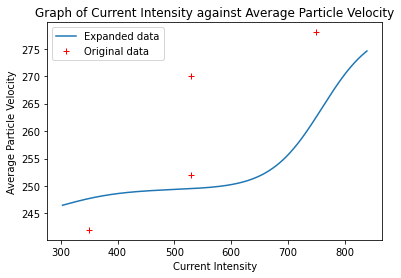

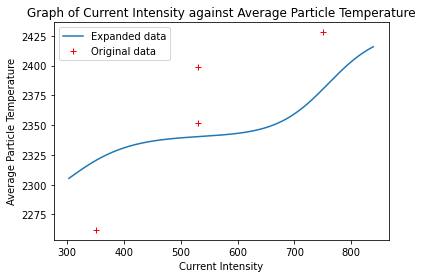

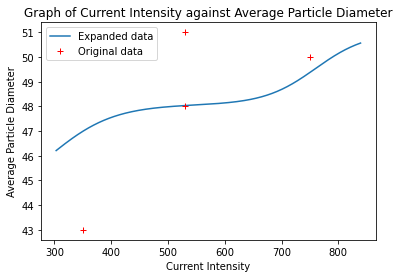

In [6]:
plt.plot(interpolated_dataset.iloc[0 : 537, 0], interpolated_dataset.iloc[0: 537, 6])
plt.plot([350, 530, 750, 530], [242, 270, 278, 252], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Current Intensity against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[0 : 537, 0], interpolated_dataset.iloc[0: 537, 7])
plt.plot([350, 530, 750, 530], [2262, 2399, 2428, 2352], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Current Intensity against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[0 : 537, 0], interpolated_dataset.iloc[0: 537, 8])
plt.plot([350, 530, 750, 530], [43, 51, 50, 48], 'r+')
plt.xlabel("Current Intensity")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Current Intensity against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Argon Gas Flow Rate Against All Outputs

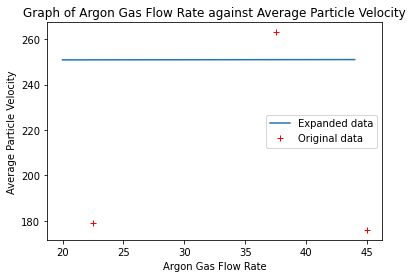

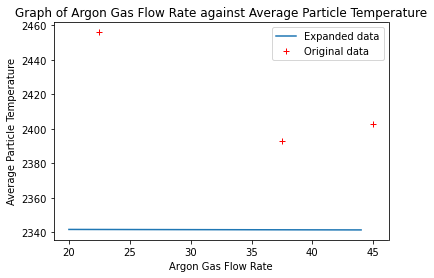

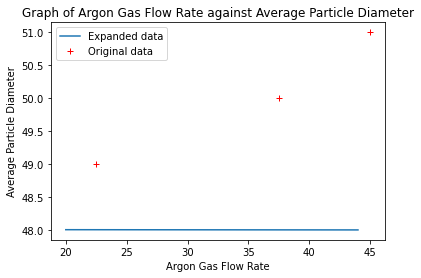

In [7]:
plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 6])
plt.plot([45, 22.5, 37.5], [176, 179, 263], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 7])
plt.plot([45, 22.5, 37.5], [2403, 2456, 2393], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[538: 563, 1], interpolated_dataset.iloc[538: 563, 8])
plt.plot([45, 22.5, 37.5], [51, 49, 50], 'r+')
plt.xlabel("Argon Gas Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Argon Gas Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Hydrogen Flow Rate Against All Outputs

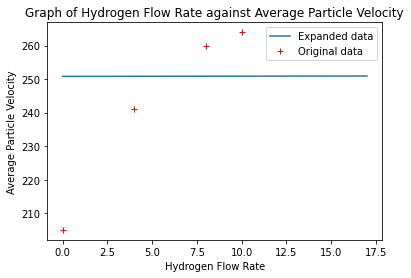

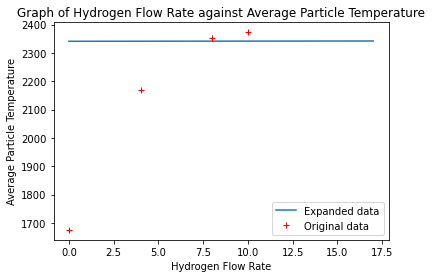

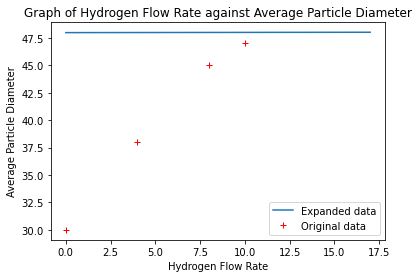

In [8]:
plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 6])
plt.plot([0, 4, 8, 10], [205, 241, 260, 264], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 7])
plt.plot([0, 4, 8, 10], [1675, 2170, 2351, 2373], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[563: 581, 2], interpolated_dataset.iloc[563: 581, 8])
plt.plot([0, 4, 8, 10], [30, 38, 45, 47], 'r+')
plt.xlabel("Hydrogen Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Hydrogen Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

# Argon Carrier Gas Flow Rate Against All Outputs

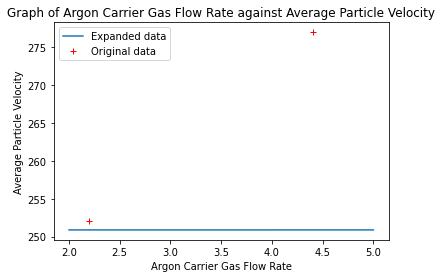

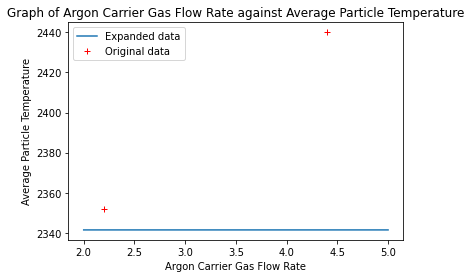

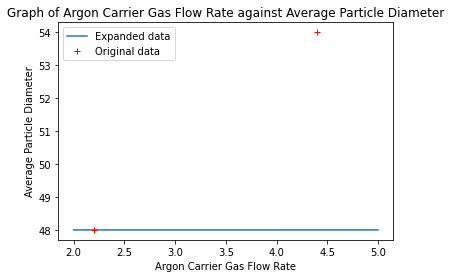

In [9]:
plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 6])
plt.plot([2.2, 4.4], [252, 277], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 7])
plt.plot([2.2, 4.4], [2352, 2440], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[581: 585, 3], interpolated_dataset.iloc[581: 585, 8])
plt.plot([2.2, 4.4], [48, 54], 'r+')
plt.xlabel("Argon Carrier Gas Flow Rate")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Argon Carrier Gas Flow Rate against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

# Injector Stand-off Distance Against All Outputs

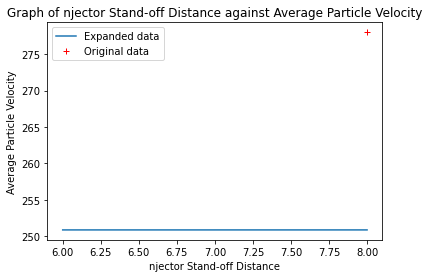

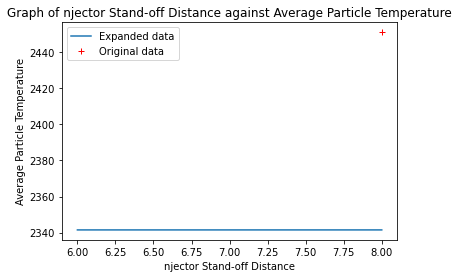

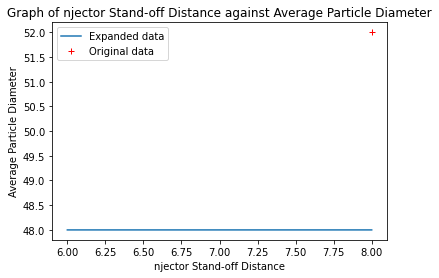

In [10]:
plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 6])
plt.plot([8], [278], 'r+')
plt.xlabel("njector Stand-off Distance")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of njector Stand-off Distance against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 7])
plt.plot([8], [2451], 'r+')
plt.xlabel("njector Stand-off Distance")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of njector Stand-off Distance against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[585: 588, 4], interpolated_dataset.iloc[585: 588, 8])
plt.plot([8], [52], 'r+')
plt.xlabel("njector Stand-off Distance")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of njector Stand-off Distance against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()

#  Injector Distance Against All Outputs

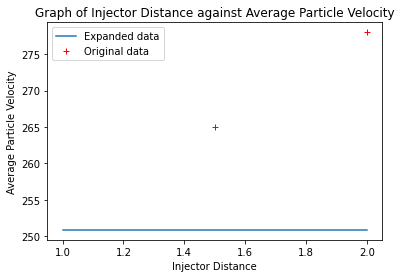

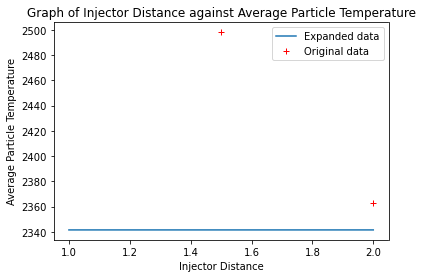

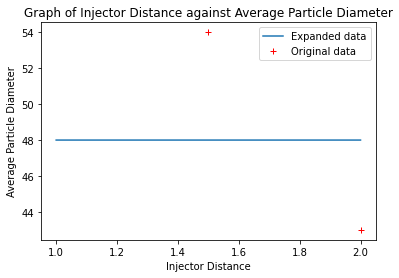

In [11]:
plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 6])
plt.plot([1.5, 2], [265, 278], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Velocity")
plt.title("Graph of Injector Distance against Average Particle Velocity")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 7])
plt.plot([1.5, 2], [2498, 2363], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Temperature")
plt.title("Graph of Injector Distance against Average Particle Temperature")
plt.legend(["Expanded data", "Original data"])
plt.show()

plt.plot(interpolated_dataset.iloc[588: 590, 5], interpolated_dataset.iloc[588: 590, 8])
plt.plot([1.5, 2], [54, 43], 'r+')
plt.xlabel("Injector Distance")
plt.ylabel("Average Particle Diameter")
plt.title("Graph of Injector Distance against Average Particle Diameter")
plt.legend(["Expanded data", "Original data"])
plt.show()